<a href="https://colab.research.google.com/github/richdied/OpenAI/blob/main/cats_vs_dogs_%E8%AA%B2%E9%A1%8C4_3%E5%95%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf
import numpy as np


from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.applications import VGG16

In [2]:
setattr(tfds.image_classification.cats_vs_dogs, '_URL',"https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip")

In [3]:
dataset_name = 'cats_vs_dogs'


train_dataset = tfds.load(name=dataset_name, split='train[:80%]')


valid_dataset = tfds.load(name=dataset_name, split='train[80%:]')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/4.0.1.incompleteH968CY/cats_vs_dogs-train.tfrecord*...:   0%|…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


In [4]:
def preprocess(data):

    x = data['image']
    y = data['label']

    x = x / 255

    x = tf.image.resize(x, size=(224, 224))

    return x, y

In [5]:
batch_size=32

In [6]:
train_data = train_dataset.map(preprocess).batch(batch_size)
valid_data = valid_dataset.map(preprocess).batch(batch_size)

In [7]:
transfer_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
transfer_model.trainable=False

58889256/58889256 [==============================] - 2s 0us/step


In [8]:
model = Sequential([
    transfer_model,
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(128, activation='relu'),
    Dense(2, activation='softmax'),
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dropout (Dropout)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 512)               12845568  
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 2)                 258       
                                                                 
Total params: 27626178 (105.39 MB)
Trainable params: 129

In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [11]:
checkpoint_path = "my_checkpoint.ckpt"
checkpoint = ModelCheckpoint(filepath=checkpoint_path,
                             save_weights_only=True,
                             save_best_only=True,
                             monitor='val_loss',
                             verbose=1)

In [12]:
history = model.fit(train_data,
          validation_data=(valid_data),
          epochs=20,
          callbacks=[checkpoint],
          )

Epoch 1/20
582/582 [==============================] - ETA: 0s - loss: 0.2901 - acc: 0.8865
Epoch 1: val_loss improved from inf to 0.18397, saving model to my_checkpoint.ckpt
582/582 [==============================] - 107s 166ms/step - loss: 0.2901 - acc: 0.8865 - val_loss: 0.1840 - val_acc: 0.9181
Epoch 2/20
582/582 [==============================] - ETA: 0s - loss: 0.1914 - acc: 0.9196
Epoch 2: val_loss did not improve from 0.18397
582/582 [==============================] - 92s 157ms/step - loss: 0.1914 - acc: 0.9196 - val_loss: 0.2676 - val_acc: 0.8856
Epoch 3/20
582/582 [==============================] - ETA: 0s - loss: 0.1612 - acc: 0.9345
Epoch 3: val_loss did not improve from 0.18397
582/582 [==============================] - 88s 152ms/step - loss: 0.1612 - acc: 0.9345 - val_loss: 0.2752 - val_acc: 0.8949
Epoch 4/20
582/582 [==============================] - ETA: 0s - loss: 0.1433 - acc: 0.9406
Epoch 4: val_loss did not improve from 0.18397
582/582 [==============================

In [13]:
model.load_weights(checkpoint_path)

In [14]:
import matplotlib.pyplot as plt

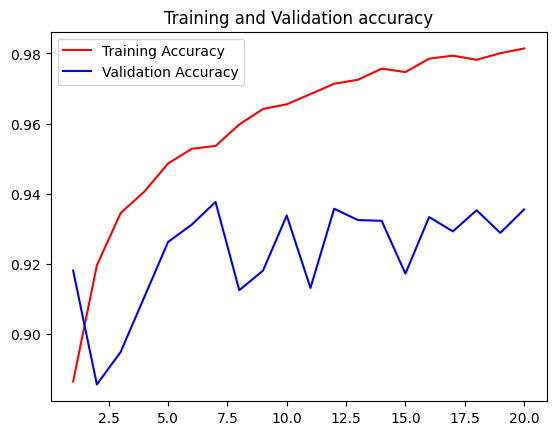

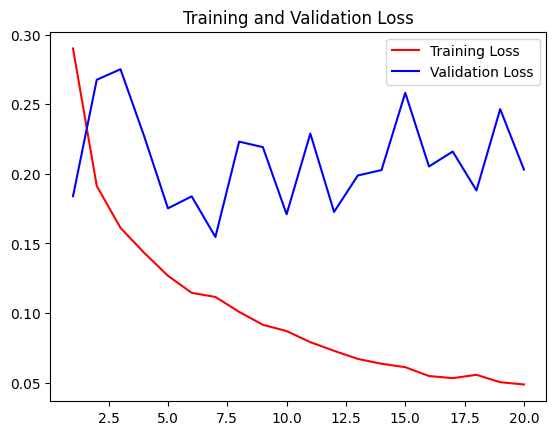

In [15]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc) + 1 )

plt.plot(epochs, acc, 'r' , label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b' , label = 'Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r' , label = 'Training Loss')
plt.plot(epochs, val_loss, 'b' , label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()


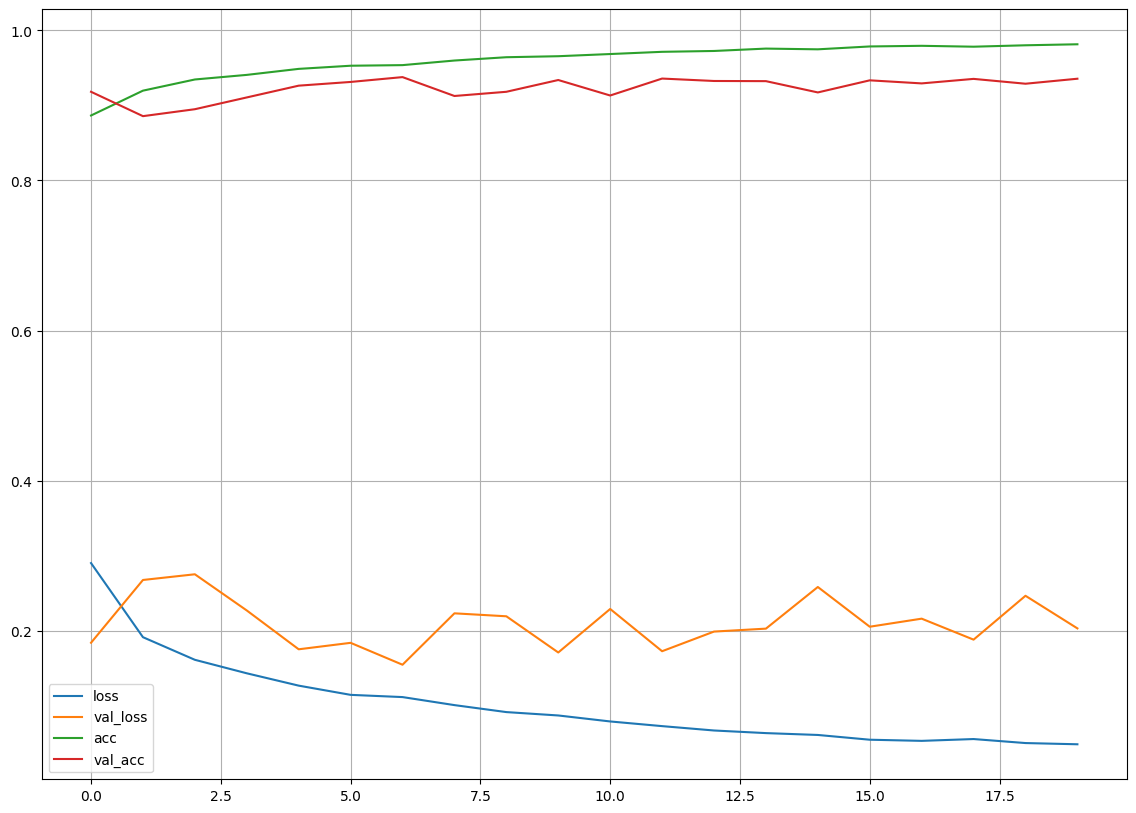

In [18]:
plot_target = ['loss', 'val_loss', 'acc', 'val_acc']
plt.figure(figsize = (14,10))

for each in plot_target:
    plt.plot(history.history[each], label = each)

plt.legend()
plt.grid()
plt.show()

In [19]:
import numpy as np

In [21]:
predicted_result = model.predict(train_data)
predicted_labels = np.argmax(predicted_result,  axis=1)
predicted_labels

582/582 [==============================] - 71s 122ms/step


array([1, 1, 1, ..., 0, 1, 0])

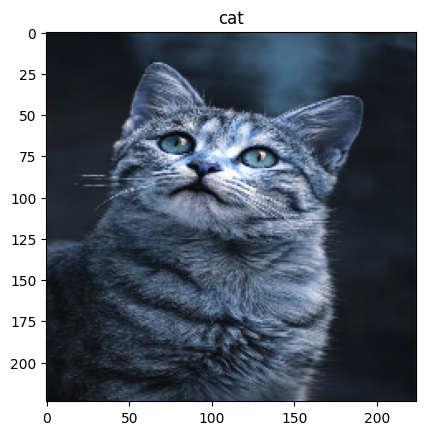

In [22]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

image_bgr = cv2.imread("/content/cat.jpg")
test_image = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
test_image = cv2.resize(image_bgr, (224, 224))
plt.imshow(test_image)
plt.title('cat')
plt.show()

In [23]:
if np.argmax(model.predict(test_image.reshape(1, 224, 224, 3))) == 0:
    print('Cat')
else :
    print('Dog')

1/1 [==============================] - 1s 1s/step
Cat


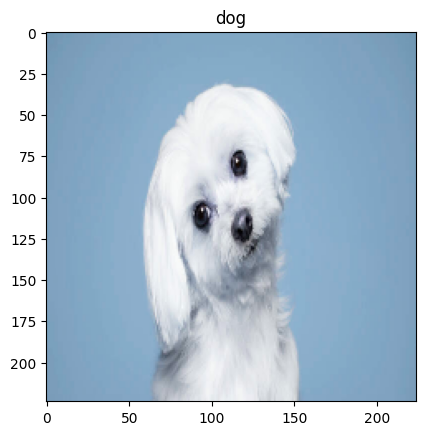

In [24]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

image_bgr = cv2.imread("/content/dog.jpg")
test_image = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
test_image = cv2.resize(image_bgr, (224, 224))
plt.imshow(test_image)
plt.title('dog')
plt.show()

In [25]:
if np.argmax(model.predict(test_image.reshape(1, 224, 224, 3))) == 0:
    print('Cat')
else :
    print('Dog')

1/1 [==============================] - 0s 18ms/step
Dog
